In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Section 1: Introduction & Dataset Overview

In [ ]:
# Load dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("asos_merged_training.csv")

KeyboardInterrupt: 

In [ ]:
# Display basic information about the dataset
print("Dataset Overview:")
df.info()
print("Shape of dataset:", df.shape)
print("Columns in dataset:", df.columns.tolist())
df.head()

Dataset Overview:


NameError: name 'df' is not defined

# Section 2: Data Preprocessing

In [ ]:
# Convert yearOfBirth to numeric and create an 'age' column
df["yearOfBirth"] = pd.to_numeric(df["yearOfBirth"], errors="coerce")
df["age"] = 2023 - df["yearOfBirth"]

In [ ]:
# Filter reasonable age range (15 to 90)
df = df[df["age"].between(15, 90)]

In [ ]:
# Encode categorical features
df['brandDesc'] = df['brandDesc'].astype('category').cat.codes

# Section 3: Exploratory Data Analysis (EDA)

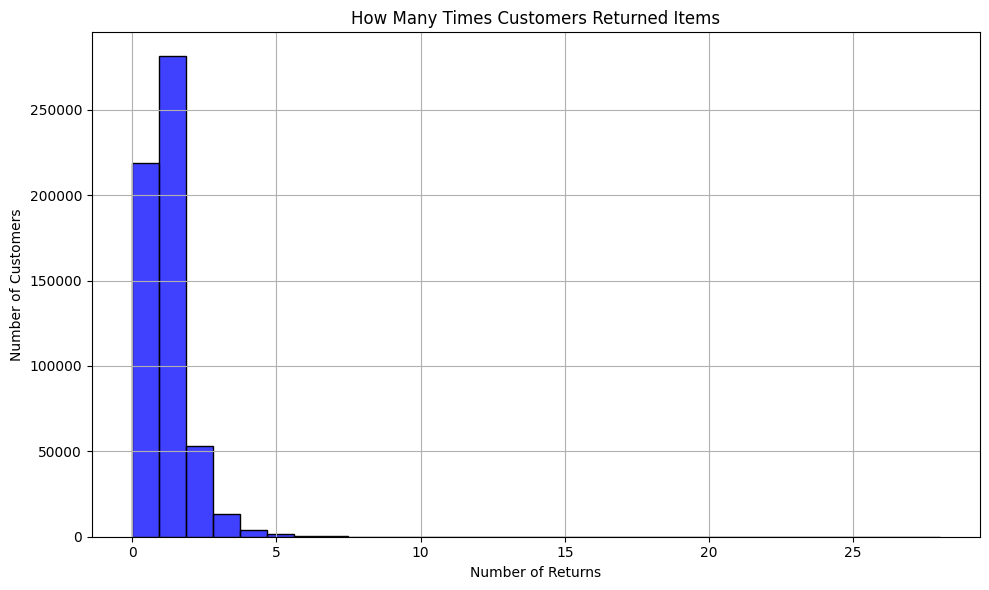

In [ ]:
# Visualization Step 1: Return Frequency per Customer
def plot_return_frequency(df):
    returns_per_customer = df.groupby("customer_id")["isReturned"].sum()
    plt.figure(figsize=(10, 6))
    sns.histplot(returns_per_customer, bins=30, kde=False, color="blue", edgecolor="black")
    plt.title("How Many Times Customers Returned Items")
    plt.xlabel("Number of Returns")
    plt.ylabel("Number of Customers")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("returns_per_customer.png")
    plt.show()
plot_return_frequency(df)

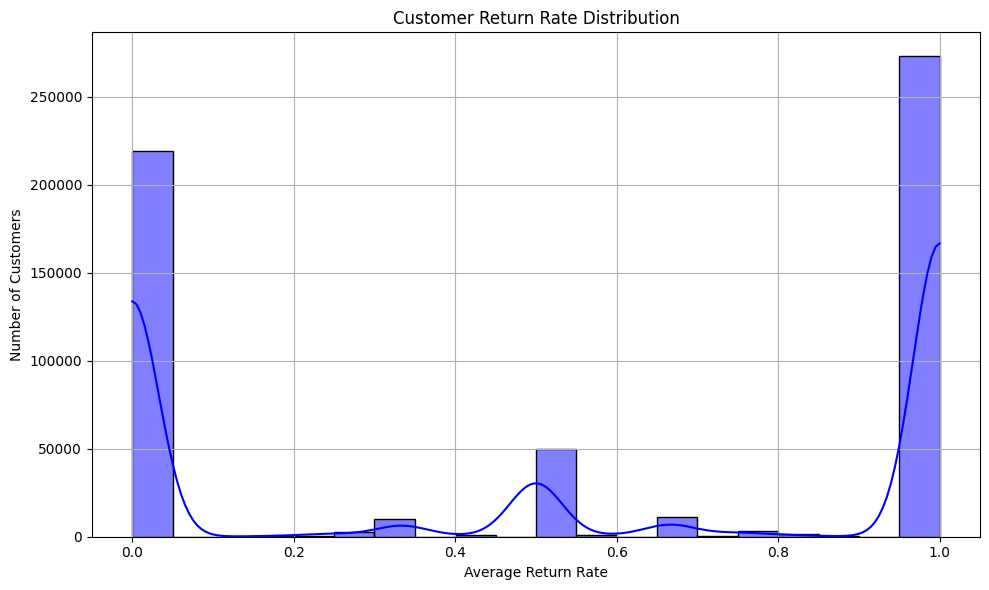

In [ ]:
# Visualization Step 2: Customer Return Rate Distribution
def plot_return_rate(df):
    return_rate_per_customer = df.groupby("customer_id")["isReturned"].mean()
    plt.figure(figsize=(10, 6))
    sns.histplot(return_rate_per_customer, bins=20, kde=True, color="blue", edgecolor="black")
    plt.title("Customer Return Rate Distribution")
    plt.xlabel("Average Return Rate")
    plt.ylabel("Number of Customers")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("return_rate_per_customer.png")
    plt.show()
plot_return_rate(df)

/tmp/ipython-input-38-2611033388.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_return_rate = df.groupby("age_group")["isReturned"].mean()
/tmp/ipython-input-38-2611033388.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_return_rate.index, y=age_return_rate.values, palette="viridis")


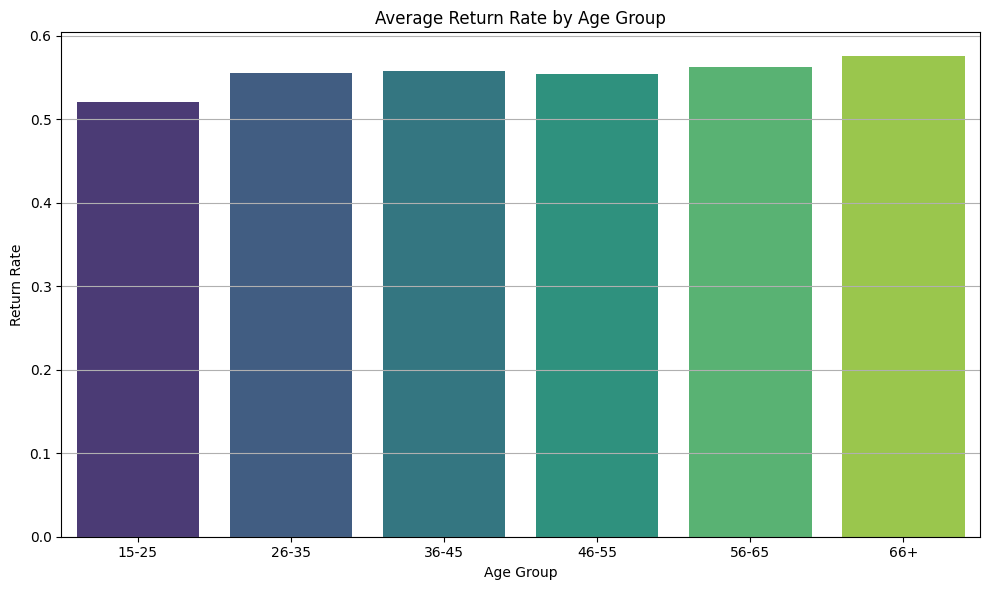

In [ ]:
# Visualization Step 3: Average Return Rate by Age Group
def plot_age_return_rate(df):
    df["yearOfBirth"] = pd.to_numeric(df["yearOfBirth"], errors="coerce")
    df["age"] = 2023 - df["yearOfBirth"]
    df = df[df["age"].between(15, 90)]
    df["age_group"] = pd.cut(df["age"], bins=[15, 25, 35, 45, 55, 65, 90],
                             labels=["15-25", "26-35", "36-45", "46-55", "56-65", "66+"])
    age_return_rate = df.groupby("age_group")["isReturned"].mean()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=age_return_rate.index, y=age_return_rate.values, palette="viridis")
    plt.title("Average Return Rate by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Return Rate")
    plt.grid(axis="y")
    plt.tight_layout()
    plt.savefig("return_rate_by_age.png")
    plt.show()
plot_age_return_rate(df)

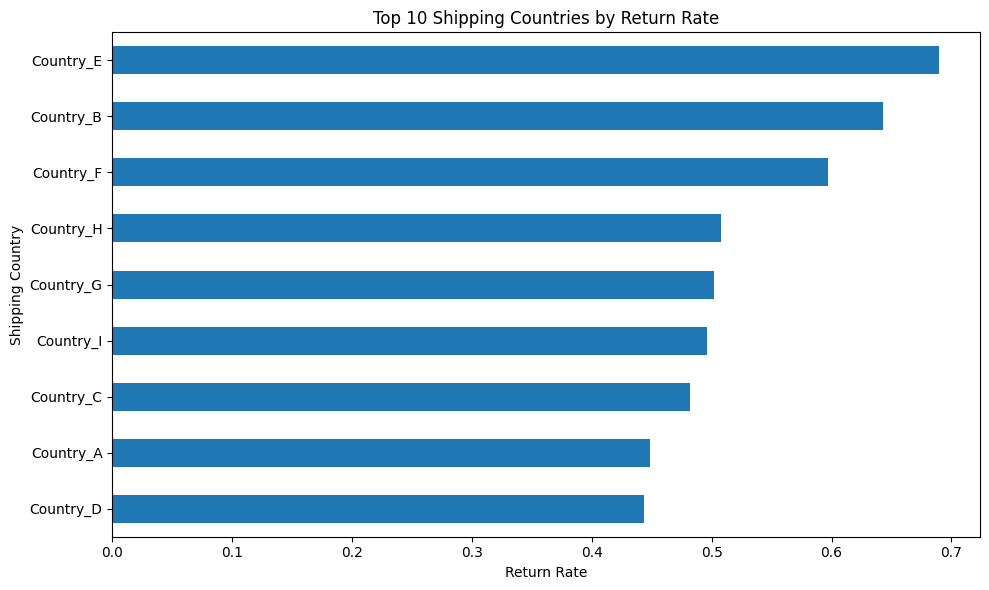

In [ ]:
# Visualization Step 4: Calculate return rate by shipping country
country_return_rate = df.groupby('shippingCountry')['isReturned'].mean().sort_values(ascending=False)

# Plot the top 10 shipping countries by return rate
plt.figure(figsize=(10, 6))
country_return_rate.head(10).plot(kind='barh')
plt.title('Top 10 Shipping Countries by Return Rate')
plt.xlabel('Return Rate')
plt.ylabel('Shipping Country')
plt.gca().invert_yaxis()
# Invert y-axis to show the highest return rate at the top
plt.tight_layout()
plt.savefig("Top 10 Shipping Countries by Return Rate")
plt.show()

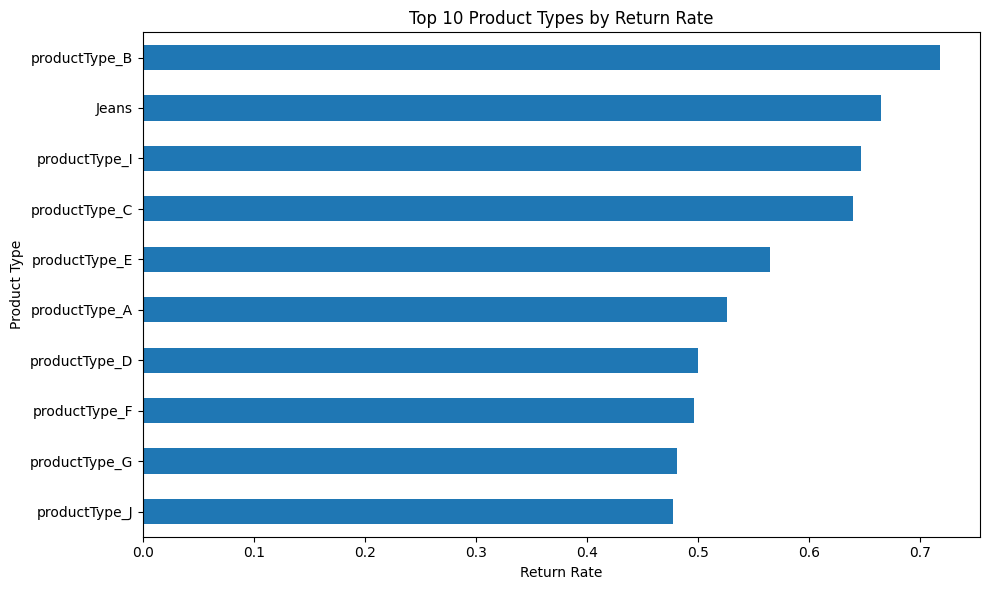

In [ ]:
# Visualization Step 5: Calculate return rate by product type
product_type_return_rate = df.groupby('productType')['isReturned'].mean().sort_values(ascending=False)

# Plot the top 10 product types by return rate
plt.figure(figsize=(10, 6))
product_type_return_rate.head(10).plot(kind='barh')
plt.title('Top 10 Product Types by Return Rate')
plt.xlabel('Return Rate')
plt.ylabel('Product Type')
plt.gca().invert_yaxis()
# Invert y-axis to show the highest return rate at the top
plt.tight_layout()
plt.savefig("Top 10 Product Types by Return Rate")
plt.show()

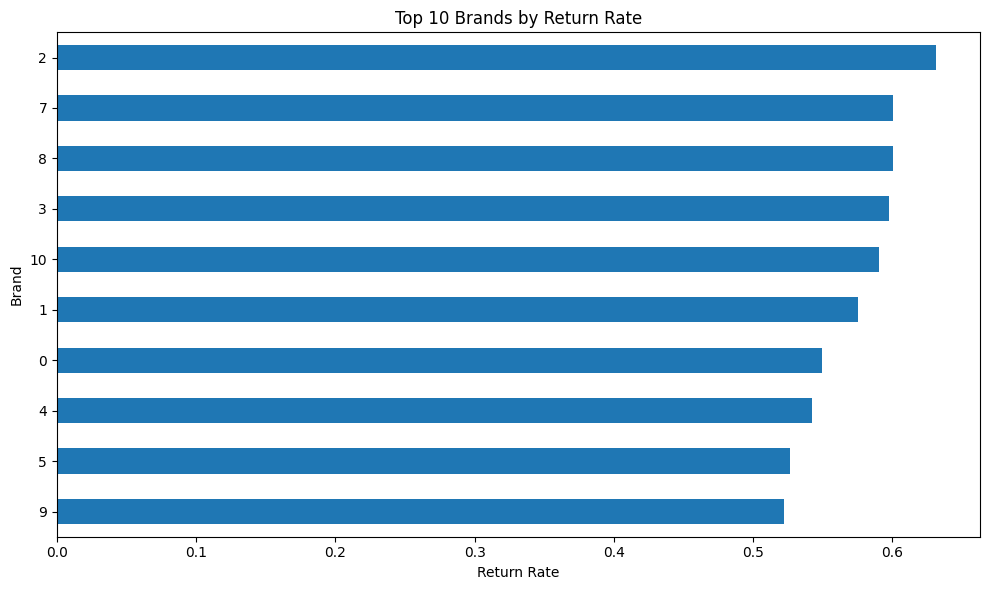

In [ ]:
# Visualization Step 6: Calculate return rate by brand
brand_return_rate = df.groupby('brandDesc')['isReturned'].mean().sort_values(ascending=False)

# Plot the top 10 brands by return rate
plt.figure(figsize=(10, 6))
brand_return_rate.head(10).plot(kind='barh')
plt.title('Top 10 Brands by Return Rate')
plt.xlabel('Return Rate')
plt.ylabel('Brand')
plt.gca().invert_yaxis()
# Invert y-axis to show the highest return rate at the top
plt.savefig("Top 10 Brands by Return Rate")
plt.tight_layout()
plt.show()

/tmp/ipython-input-7-2764307736.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_return_rate.index, y=gender_return_rate.values, palette="viridis")


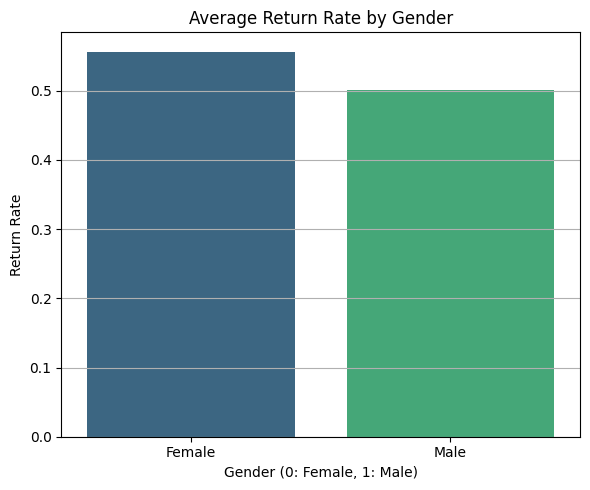

In [ ]:
# Visualization Step 7: Calculate return rate by gender
gender_return_rate = df.groupby("isMale")["isReturned"].mean()

# Plot return rate by gender
plt.figure(figsize=(6, 5))
sns.barplot(x=gender_return_rate.index, y=gender_return_rate.values, palette="viridis")
plt.title("Average Return Rate by Gender")
plt.xlabel("Gender (0: Female, 1: Male)")
plt.ylabel("Return Rate")
plt.xticks([0, 1], ["Female", "Male"])
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("return_rate_by_gender.png")
plt.show()

/tmp/ipython-input-8-1160330012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=premier_return_rate.index, y=premier_return_rate.values, palette="viridis")


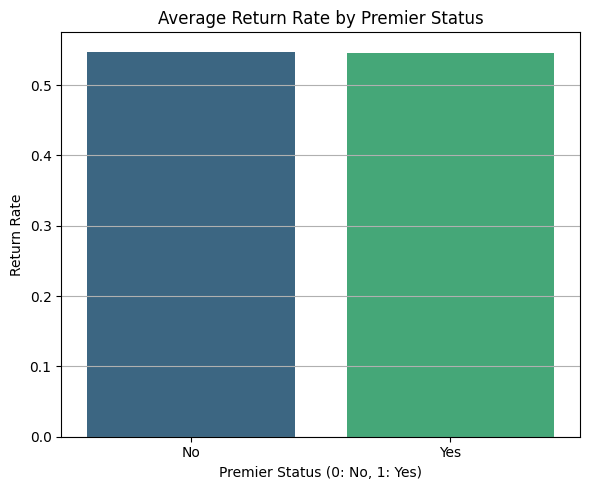

In [ ]:
# Visualization Step 8: Calculate return rate by premier status
premier_return_rate = df.groupby("premier")["isReturned"].mean()

# Plot return rate by premier status
plt.figure(figsize=(6, 5))
sns.barplot(x=premier_return_rate.index, y=premier_return_rate.values, palette="viridis")
plt.title("Average Return Rate by Premier Status")
plt.xlabel("Premier Status (0: No, 1: Yes)")
plt.ylabel("Return Rate")
plt.xticks([0, 1], ["No", "Yes"])
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("return_rate_by_premier.png")
plt.show()

# Section 4: Feature Engineering

In [ ]:
# Encode categorical feature
df['brandDesc'] = df['brandDesc'].astype('category').cat.codes

# Select features and target variable
features = ['avgGbpPrice', 'avgDiscountValue', 'salesPerCustomer', 'returnsPerCustomer', 'brandDesc']
X = df[features]
y = df['isReturned']

# Section 5: Modeling (Logistic Regression, Random Forest)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

In [ ]:
# Predict using Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

In [ ]:
# Generate evaluation metrics for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)

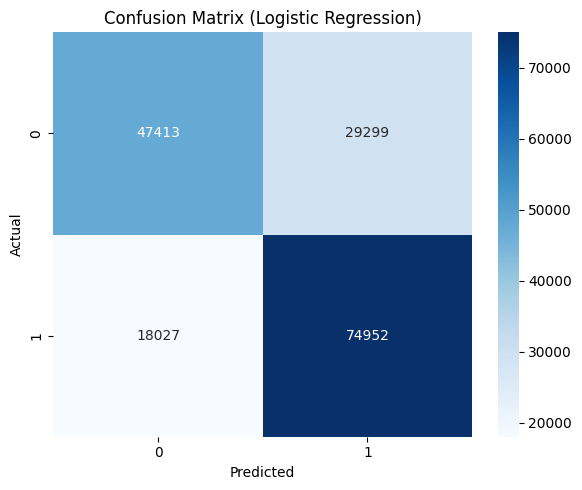

In [ ]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("confusion_matrix_logistic.png")
plt.show()

In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Generate evaluation metrics for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

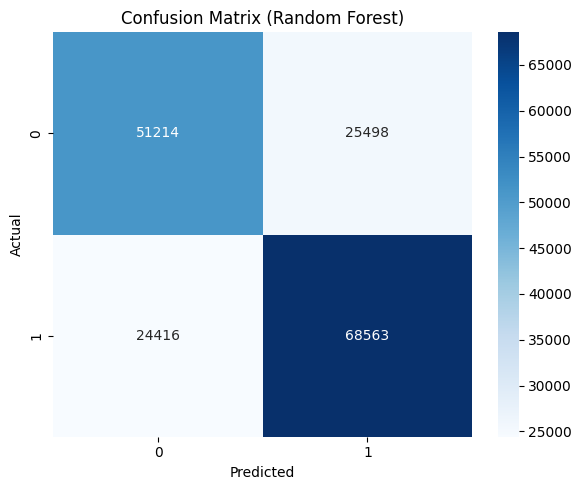

In [ ]:
# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("confusion_matrix_rf.png")
plt.show()

# Section 6: Model Evaluation

In [ ]:
# Print classification reports
print("Logistic Regression Classification Report:\n", class_report_logistic)
print("Random Forest Classification Report:\n", class_report_rf)

Logistic Regression Classification Report:
 {'0': {'precision': 0.724526283618582, 'recall': 0.6180649702784441, 'f1-score': 0.6670746806235579, 'support': 76712.0}, '1': {'precision': 0.7189571323056854, 'recall': 0.8061175104055754, 'f1-score': 0.7600466460477615, 'support': 92979.0}, 'accuracy': 0.7211048317235446, 'macro avg': {'precision': 0.7217417079621337, 'recall': 0.7120912403420098, 'f1-score': 0.7135606633356597, 'support': 169691.0}, 'weighted avg': {'precision': 0.7214747716354961, 'recall': 0.7211048317235446, 'f1-score': 0.7180169248980157, 'support': 169691.0}}
Random Forest Classification Report:
 {'0': {'precision': 0.6771651461060426, 'recall': 0.6676139326311399, 'f1-score': 0.672355620905594, 'support': 76712.0}, '1': {'precision': 0.7289205940825635, 'recall': 0.7374030695103195, 'f1-score': 0.7331372968349016, 'support': 92979.0}, 'accuracy': 0.7058535809206146, 'macro avg': {'precision': 0.703042870094303, 'recall': 0.7025085010707297, 'f1-score': 0.70274645887

# Section 7: Interpretation & Business Insights

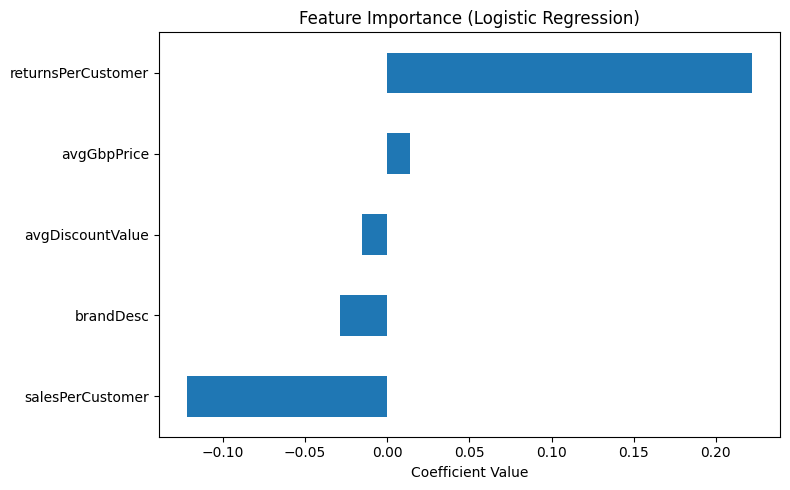

In [ ]:
# Feature importance - Logistic Regression
coeffs_logistic = pd.Series(logistic_model.coef_[0], index=features)
plt.figure(figsize=(8, 5))
coeffs_logistic.sort_values().plot(kind='barh', title='Feature Importance (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.savefig("Feature importance")
plt.show()

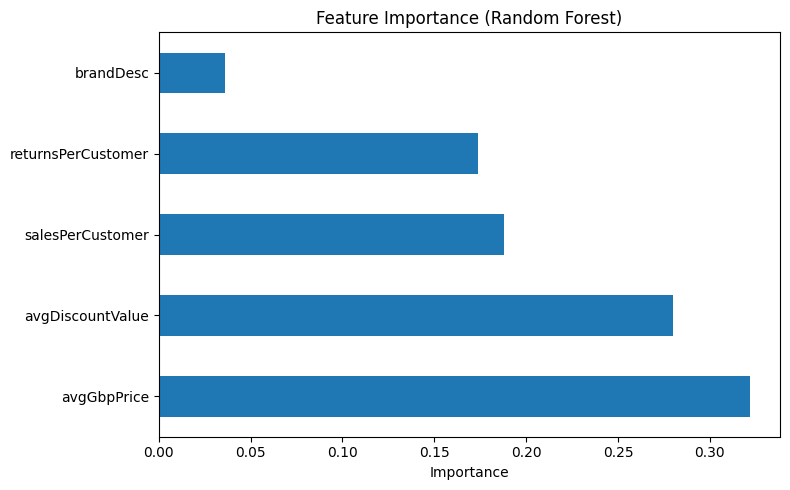

In [ ]:
# Feature importance - Random Forest
importances_rf = pd.Series(rf_model.feature_importances_, index=features)
plt.figure(figsize=(8, 5))
importances_rf.sort_values(ascending=False).plot(kind='barh', title='Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

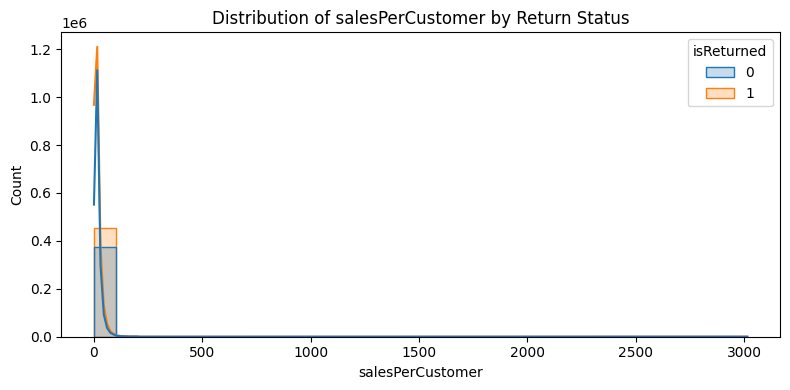

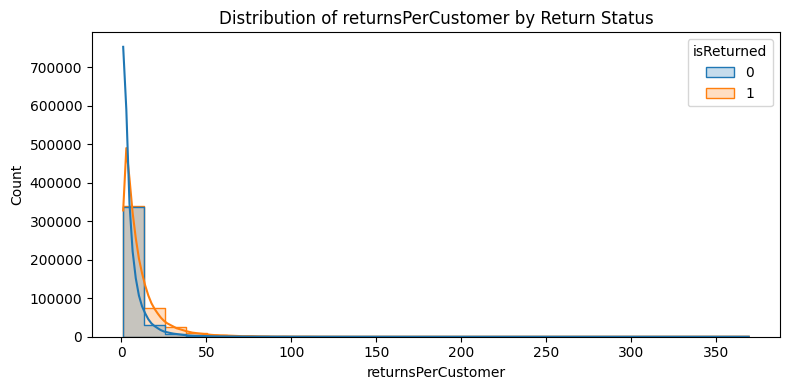

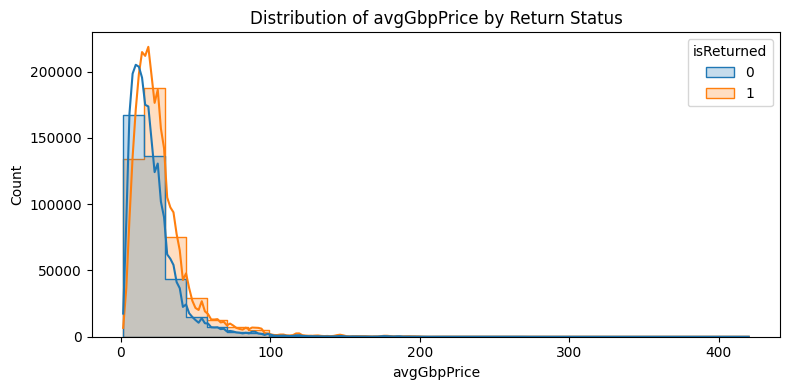

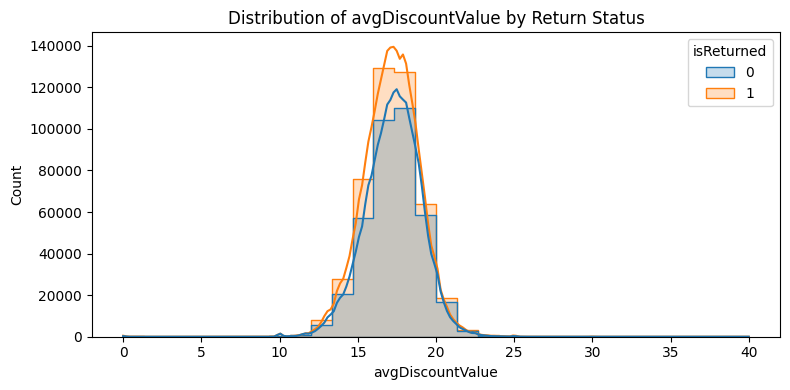

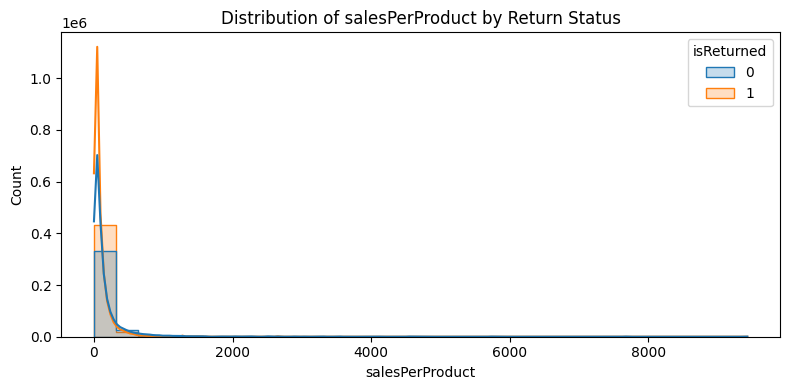

In [ ]:
# Visualization of high-impact behavioral features
graphic_features = ['salesPerCustomer', 'returnsPerCustomer', 'avgGbpPrice', 'avgDiscountValue', 'salesPerProduct']
for feat in graphic_features:
    if feat in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=df, x=feat, hue='isReturned', bins=30, kde=True, element='step')
        plt.title(f'Distribution of {feat} by Return Status')
        plt.xlabel(feat)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.savefig(f"{feat}_by_return_status.png")
        plt.show()

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[47413 29299]
 [18027 74952]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67     76712
           1       0.72      0.81      0.76     92979

    accuracy                           0.72    169691
   macro avg       0.72      0.71      0.71    169691
weighted avg       0.72      0.72      0.72    169691

